In [1]:
#r "nuget: Microsoft.SemanticKernel"
#r "nuget: SkiaSharp"

#!import config/Settings.cs
#!import config/Utils.cs
#!import config/SkiaUtils.cs

using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.TextToImage;
using Microsoft.SemanticKernel.ChatCompletion;
using Microsoft.SemanticKernel.Connectors.OpenAI;

Installed Packages Microsoft.SemanticKernel, 1.17.1 SkiaSharp, 2.88.8

Loading extensions from `C:\Users\mikokono\.nuget\packages\skiasharp\2.88.8\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll`

In [2]:
using Kernel = Microsoft.SemanticKernel.Kernel;

#pragma warning disable SKEXP0001, SKEXP0010

var settings = Settings.LoadFromFile("config/settings.json");
var builder = Kernel.CreateBuilder();

builder
    .AddAzureOpenAIChatCompletion(settings.model, settings.azureEndpoint, settings.apiKey);

var kernel = builder.Build();
var chatGPT = kernel.GetRequiredService<IChatCompletionService>();

In [3]:
public static ImageContent GetImageContent(string path)
{
        var imageData = new ReadOnlyMemory<byte>(File.ReadAllBytes(path));
        ImageContent imageContent = new(new BinaryData(imageData), "image/png");
        return imageContent; 
}

__Vision__

This samples uses the [GPT-4 Turbo Vision](https://learn.microsoft.com/en-us/azure/ai-services/openai/how-to/gpt-with-vision?tabs=rest%2Csystem-assigned%2Cresource) capabilities to "read" images. The code loads two images and tells the model to count how often shte small image is in the larger one.

In [4]:
string systemPrompt = """
"You are a helpful assistant. 
You receive two images: one containing the object to be found in the other.
""";

// Add system message
var chatHistory = new ChatHistory(systemPrompt);

var smallImagePath = "data/vision/rect.png";
var bigImagePath = "data/vision/more.png";
var small = GetImageContent(smallImagePath);
var big = GetImageContent(bigImagePath);

chatHistory.AddUserMessage(new ChatMessageContentItemCollection
{
    small,
    big
});


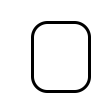


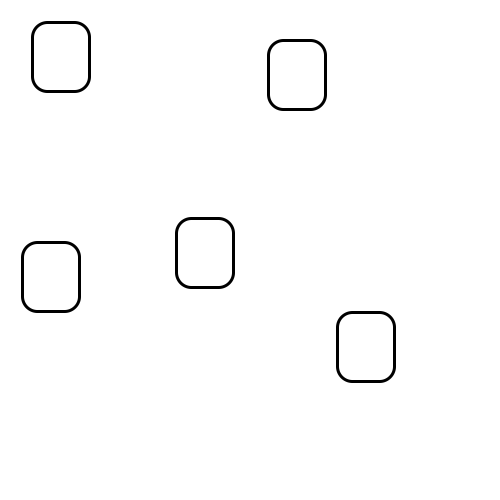

The object in the first image can be found five times in various positions in the second image.


In [5]:
var reply = await chatGPT.GetChatMessageContentAsync(chatHistory);

await SkiaUtils.ShowLocalImage(smallImagePath, 100, 100);
await SkiaUtils.ShowLocalImage(bigImagePath, 500, 500);

Console.WriteLine($"{reply}");